# Step 1: Import Data and Libraries

In [1]:
#Libraries for data visualization and manipulation
import pandas as pd                                  #for data cell manipulation
import numpy as np                                   #for numerical analysis
import seaborn as sns                                #for data visualization
import matplotlib.pyplot as plt                      #for data plotting

#Libararies for SVM
from sklearn.model_selection import train_test_split #To split data into training and testing sets
from sklearn.svm import SVC                          #Support Vector Classifier
from sklearn.metrics import confusion_matrix         #Confusion Matrix
from sklearn.metrics import classification_report    #Classification Report
from sklearn.model_selection import GridSearchCV     #To find best parameters

import warnings                                      #To ignore warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.datasets import load_breast_cancer      #Import cancer data from the Sklearn library
data_set = load_breast_cancer()

In [3]:
data_set.keys()                                      #See keys for data

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
print(data_set['DESCR'])  #See data description 

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [29]:
#Fit data into a DataFrame
df = pd.DataFrame(np.c_[data_set['data'], data_set['target']],\
                  columns = np.append(data_set['feature_names'], ['target']))

In [47]:
df.shape

(569, 31)

In [30]:
df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [22]:
df.tail(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1.0


In [9]:
df.rename(columns={'target':'target'}, inplace=True) #Rename target column to target

<AxesSubplot:>

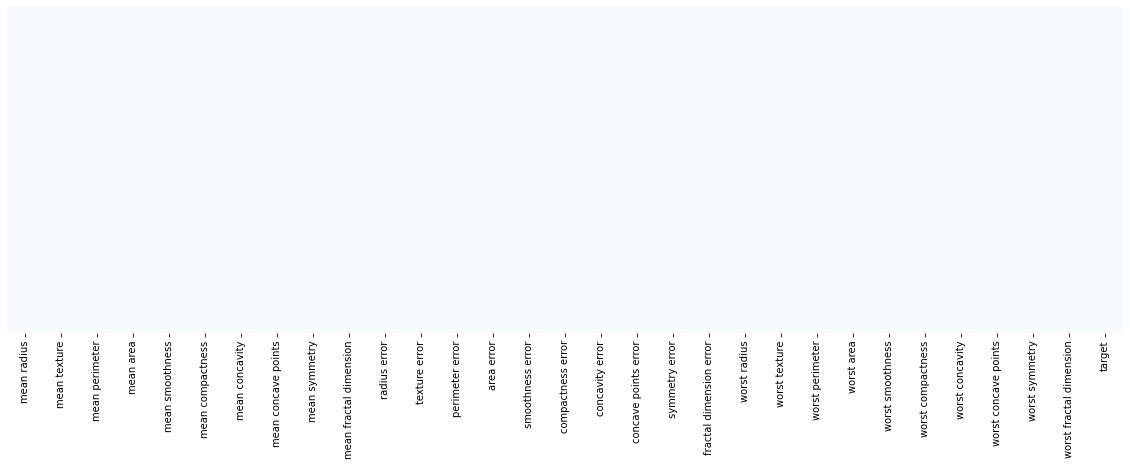

In [10]:
plt.figure(figsize=(20,6))                           #Check for Null values
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

# Step 2: Visualize Data

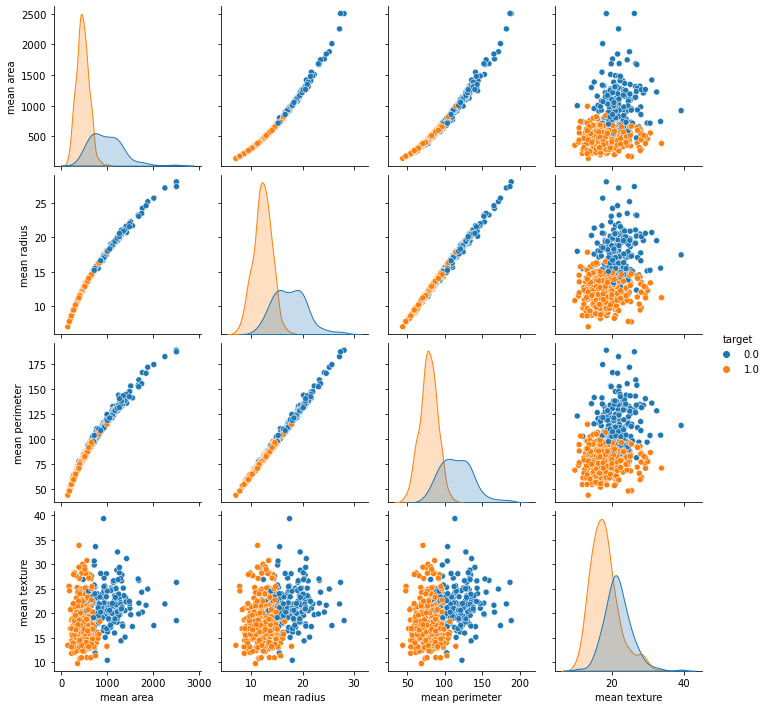

In [35]:
sns.pairplot(df, hue = 'target',                                               #Pairplot inputs
             vars=['mean area','mean radius','mean perimeter','mean texture']) #Specify inputs you want to see

<AxesSubplot:xlabel='target', ylabel='count'>

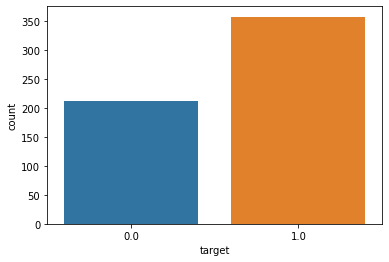

In [36]:
sns.countplot(df['target']) #Count plot by target

# Step 3: Create Training and Test Sets

In [37]:
X=df.drop('target',axis=1)                          #Inputs
y=df['target']                                      #Outputs
ratio=0.2                                           #Ratio of testing set
X_train, X_test, y_train, y_test = train_test_split\
(X,y,test_size=ratio,random_state=0)                #Split data into training annd testing set

# Step 4: Scale Inputs

In [40]:
min_X_train = X_train.min()                   #Find inimums
range_X_train = X_train.max()-X.min()         #Find range
X_train = (X_train-min_X_train)/range_X_train #Scale training set
X_test = (X_test-min_X_train)/range_X_train   #Scale testing set

In [41]:
X_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
338,-0.024285,-0.037254,-0.003330,-0.000498,0.551108,0.188154,0.058833,0.088221,0.468895,0.295957,...,-0.016581,-0.035843,-0.002174,-0.000265,0.490783,0.112619,0.084265,0.223872,0.310581,0.149929
427,-0.030220,-0.058453,-0.004037,-0.000644,0.405621,0.132874,0.084677,0.069781,0.540076,0.217479,...,-0.024794,-0.048419,-0.003354,-0.000406,0.420397,0.141944,0.153914,0.257837,0.327173,0.149790
406,-0.072476,-0.024534,-0.009772,-0.001954,0.485186,0.229187,0.128866,0.225050,0.381330,0.194866,...,-0.050205,-0.018284,-0.006601,-0.001018,0.351433,0.144537,0.184505,0.388908,0.283472,0.104672
96,-0.041140,-0.038731,-0.005491,-0.000916,0.594673,0.178761,0.058341,0.146173,0.474544,0.363351,...,-0.025154,-0.021525,-0.003198,-0.000414,0.304509,0.066119,0.039776,0.202618,0.154706,0.129938
490,-0.041694,-0.060645,-0.005554,-0.000961,0.335801,0.113912,0.040159,0.062674,0.273428,0.217257,...,-0.032032,-0.048298,-0.004267,-0.000584,0.386981,0.152716,0.098243,0.218223,0.358722,0.187341


# Step 5: Adjust C and gamma parameters

In [42]:
param_grid={'C':[0.1,1,10,100], 'gamma':[10,1,0.1,0.01,0.001], 'kernel':['rbf']} #Specify parameters to test
classifier = GridSearchCV(SVC(), param_grid, refit=True, verbose=4)              #Test parameters
classifier.fit(X_train, y_train)                                                 #Train model

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV] ......... C=0.1, gamma=10, kernel=rbf, score=0.670, total=   0.0s
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV] ......... C=0.1, gamma=10, kernel=rbf, score=0.648, total=   0.0s
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV] ......... C=0.1, gamma=10, kernel=rbf, score=0.648, total=   0.0s
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV] ......... C=0.1, gamma=10, kernel=rbf, score=0.637, total=   0.0s
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV] ......... C=0.1, gamma=10, kernel=rbf, score=0.648, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.890, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.637, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.637, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.637, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.637, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.637, total=   0.0s
[CV] C=1, gamma=10, kernel=rbf .......................................
[CV] ........... C=1, gamma=10, kernel=rbf, score=0.912, total=   0.0s
[CV] C=1, gamma=10, kernel=rbf .......................................
[CV] ........... C=1, gamma=10, kernel=rbf, score=0.934, total=   0.0s
[CV] C=1, gamma=10, kernel=rbf .......................................
[CV] .

[CV] ...... C=100, gamma=0.001, kernel=rbf, score=0.956, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=100, gamma=0.001, kernel=rbf, score=0.945, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=100, gamma=0.001, kernel=rbf, score=0.945, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=100, gamma=0.001, kernel=rbf, score=0.945, total=   0.0s


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.9s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [10, 1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=4)

In [43]:
classifier.best_params_    #Best parameters

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [44]:
classifier.best_estimator_ #Best estimator

SVC(C=10, gamma=1)

# Step 6: Evaluate Model

<AxesSubplot:>

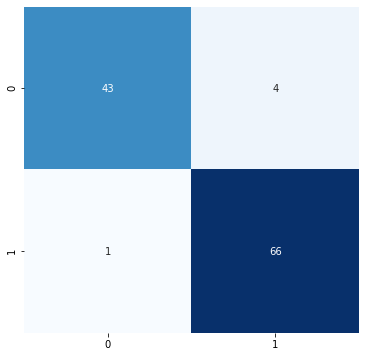

In [45]:
y_predict = classifier.predict(X_test)              #Get predictions
cm = confusion_matrix (y_test,y_predict)            #Create confusion matrix
plt.figure(figsize=(6,6))                           #Plot confusion matrix
sns.heatmap(cm,cmap='Blues', annot=True, cbar=False)

In [46]:
print(classification_report(y_test,y_predict)) #Create classification report

              precision    recall  f1-score   support

         0.0       0.98      0.91      0.95        47
         1.0       0.94      0.99      0.96        67

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

